<a href="https://colab.research.google.com/github/N3pps/Machine-Learning-Diabetes-Risk-Factor-Analysis/blob/main/Kopie_von_Webeet_home_assignment_v1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Diabetes Risk Factor Analysis

## Load Required Libraries

In [3]:
#General Data Analysis Librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import statsmodels.api as sm
#for Data import
from google.colab import drive

## EDA

Given csv file contains data sampled from the Behavioral Risk Factor Surveillance System (BRFSS) data. BRFSS is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. This original dataset for 2015 year contains responses from 441,455 individuals and has 330 features. The given sample data is a clean dataset of 70,692 survey responses. It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is balanced.

In [4]:
#Loading the Dataset
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Webeeit.io Home assignment/diabetes_BRFSS2015 - diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df.head()

Mounted at /content/drive


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


**Variables**
- `Diabetes_binary` - 0 is for no diabetes, and 1 is for prediabetes or diabetes
- `HighBP` - (Blood Pressure) 0 = no high BP 1 = high BP
- `HighChol` - 0 = no high cholesterol 1 = high cholesterol
- `CholCheck` - 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
- `BMI` - Body Mass Index
- `Smoker` - Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes
- `Stroke` - (Ever told) you had a stroke. 0 = no 1 = yes
- `HeartDiseaseorAttack` - coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
- `PhysActivity` - physical activity in past 30 days - not including job; 0 = no 1 = yes
- `Fruits` - Consume Fruit 1 or more times per day 0 = no 1 = yes
- `Veggies` - Consume Vegetables 1 or more times per day 0 = no 1 = yes
- `HvyAlcoholConsump` - (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes
- `AnyHealthCare` - Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
- `NoDocbcCost`- Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes
- `GenHlth` - Would you say that, in general, your health is on a scale of 1-5:
1 = excellent 2 = very good 3 = good 4 = fair 5 = poor.
- `MentHlth` - days of poor mental health scale 1-30 days
- `PhysHlth` - physical illness or injury count of days in the past 30 days, on a scale of 1-30
- `DiffWalk` - Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
- `Sex`- 0 = female 1 = male
- `Age` - Age in category (see mapping below) -
    
    *1 - (18 <= AGE <= 24)*
    
    *2 - (25 <= AGE <= 29)*
    
    *3 - (30 <= AGE <= 34)*
    
    *4 - (35 <= AGE <= 39)*
    
    *5 - (40 <= AGE <= 44)*
    
    *6 - (45 <= AGE <= 49)*
    
    *7 - (50 <= AGE <= 54)*
    
    *8 - (55 <= AGE <= 59)*
    
    *9 - (60 <= AGE <= 64)*
    
    *10 - (65 <= AGE <= 69)*
    
    *11 - (70 <= AGE <= 74)*
    
    *12 - (75 <= AGE <= 79)*
    
    *13 - (80 <= AGE <= 99)*
    
    *14 - Don’t know / Refused to answer / Missing*

- `Education` - Education category (see mapping below) -

  1, 2, 3 - Didn’t graduate high school

  4 - Graduated high school

  5 - Attended college or technical school

  6 - Graduated college or technical school

  9 - Don’t know / Refused to answer / Missing*

- `Income` - Income category (see mapping below) -
    
    1, 2 - income less than $15,000

    3, 4 - $15,000 <= income < $25,000

    5 - $25,000 <= income < $35,000

    6 - $35,000 to less than $50,000

    7, 8 - income >= $50,000

    9 - Don’t know / Not sure / Missing Respondents


In [5]:
# Get a summary of the dataset
df.describe()

# Check for class distribution (although you mentioned it's 50/50)
df['Diabetes_binary'].value_counts()

,count
Diabetes_binary,
0,35346
1,35346


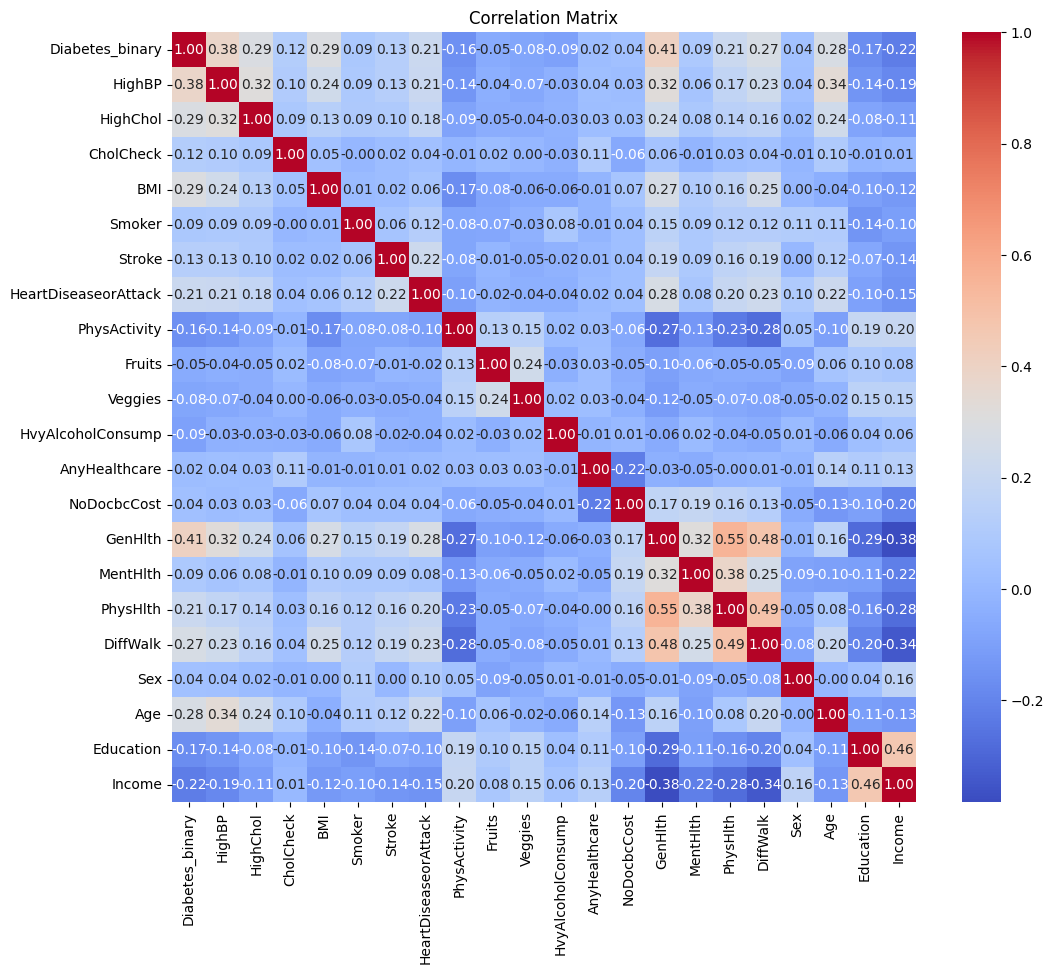

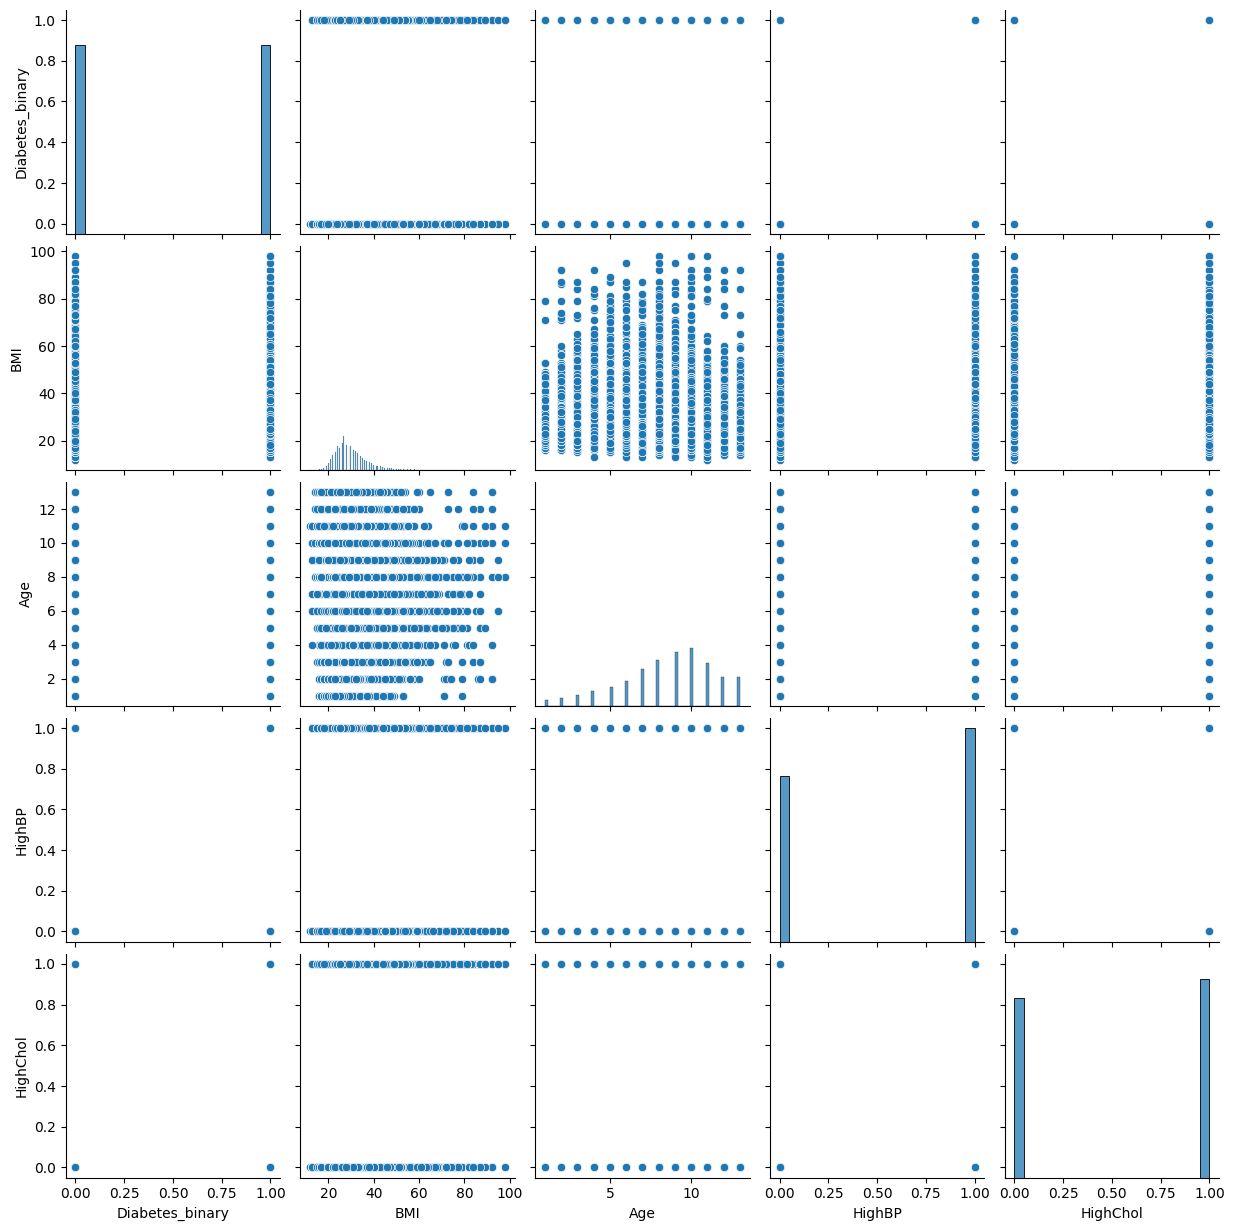

In [6]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Pairplot for selected variables
sns.pairplot(df[['Diabetes_binary', 'BMI', 'Age', 'HighBP', 'HighChol']])
plt.show()

In [7]:
# Correlation of all variables with the target variable 'Diabetes_binary'
correlation_with_diabetes = df.corr()['Diabetes_binary'].sort_values(ascending=False)
print(correlation_with_diabetes)

Diabetes_binary         1.000000
GenHlth                 0.407612
HighBP                  0.381516
BMI                     0.293373
HighChol                0.289213
Age                     0.278738
DiffWalk                0.272646
PhysHlth                0.213081
HeartDiseaseorAttack    0.211523
Stroke                  0.125427
CholCheck               0.115382
MentHlth                0.087029
Smoker                  0.085999
Sex                     0.044413
NoDocbcCost             0.040977
AnyHealthcare           0.023191
Fruits                 -0.054077
Veggies                -0.079293
HvyAlcoholConsump      -0.094853
PhysActivity           -0.158666
Education              -0.170481
Income                 -0.224449
Name: Diabetes_binary, dtype: float64


<ipython-input-8-8d0d69eead91>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_diabetes.values, y=correlation_with_diabetes.index, palette='Spectral')


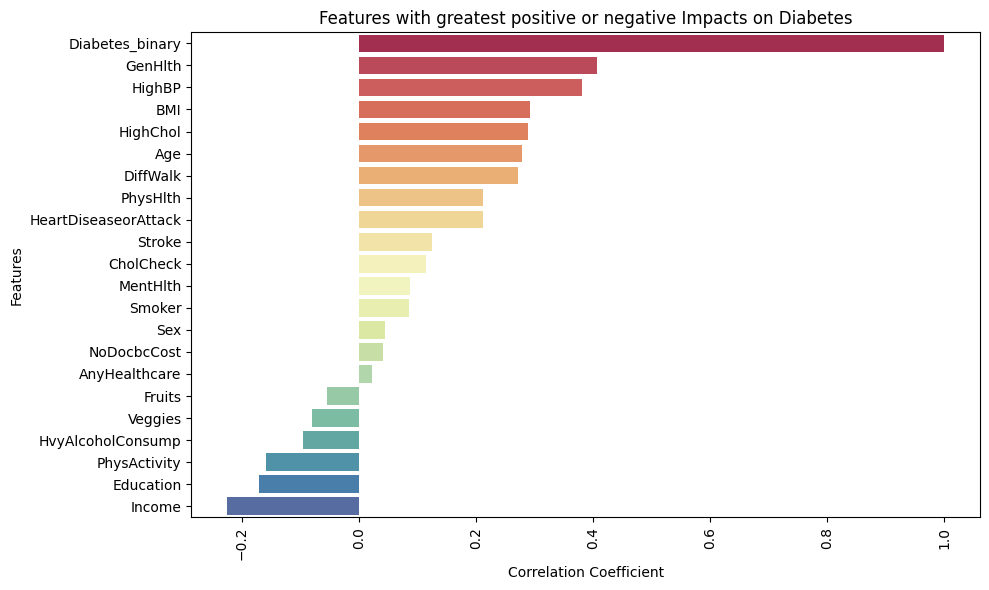

In [8]:
#creating a barchart with the correlating values from diabetes binary
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_diabetes.values, y=correlation_with_diabetes.index, palette='Spectral')
plt.xticks(rotation=90)
plt.title('Features with greatest positive or negative Impacts on Diabetes')
plt.ylabel('Features')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()


## Logistic Regression Model


In [9]:
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Fit the Model

In [10]:
# Fit logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict the test set results
y_pred = logreg.predict(X_test)

Evaluate the Model

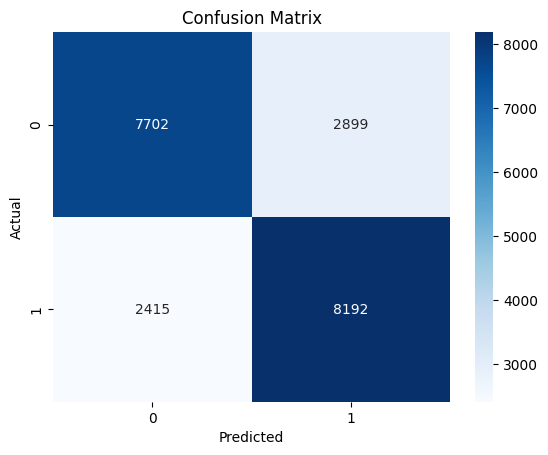

              precision    recall  f1-score   support

           0       0.76      0.73      0.74     10601
           1       0.74      0.77      0.76     10607

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



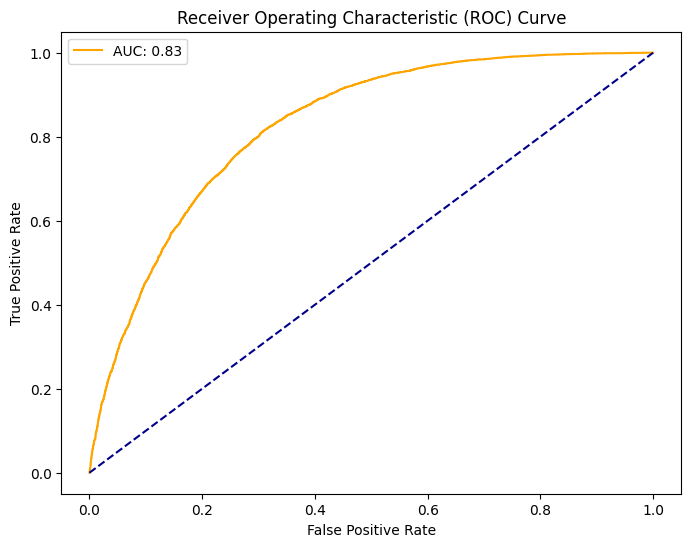

In [11]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# ROC Curve and AUC
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'AUC: {roc_auc_score(y_test, y_pred_prob):.2f}')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

The Area Under the Curve (AUC) is 0.83

0.5: No discrimination (random guess)

0.6 - 0.7: Poor discrimination

0.7 - 0.8: Acceptable discrimination

0.8 - 0.9: Excellent discrimination

0.9 - 1.0: Outstanding discrimination

Logistic Regression with Statsmodels for Detailed Analysis

In [12]:
# Add a constant to the model (for intercept)
X_train_sm = sm.add_constant(X_train)

# Fit the model
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.512710
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:                49484
Model:                          Logit   Df Residuals:                    49462
Method:                           MLE   Df Model:                           21
Date:                Fri, 30 Aug 2024   Pseudo R-squ.:                  0.2603
Time:                        12:37:58   Log-Likelihood:                -25371.
converged:                       True   LL-Null:                       -34300.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -6.7746      0.147    -46.125      0.000      -7.062      -6.487

Significant Predictors (p-value < 0.05)
The following variables have a statistically significant relationship with the outcome (Diabetes_binary) as indicated by their p-values (P>|z|) being less than 0.05:

In [13]:
# Get the p-values and coefficients
p_values = result.pvalues
coefficients = result.params

# Create a DataFrame for easier manipulation
df_results = pd.DataFrame({'p_value': p_values, 'coefficient': coefficients})

# Filter out p-values greater than 0.05 (This suggests that the observed data is unlikely under the null hypothesis)
significant_results = df_results[df_results['p_value'] < 0.05]

# drop constant
significant_results = significant_results.drop('const')

# Sort by coefficient
sorted_results = significant_results.sort_values(by='coefficient', ascending=False)

# Display the results
print(sorted_results)


                            p_value  coefficient
CholCheck              1.550293e-41     1.280291
HighBP                5.861112e-211     0.731984
HighChol              1.418904e-150     0.589226
GenHlth                0.000000e+00     0.585611
Sex                    6.134200e-29     0.255267
HeartDiseaseorAttack   1.718181e-13     0.251239
Stroke                 5.293136e-05     0.198748
Age                   5.953318e-230     0.151208
DiffWalk               1.380418e-04     0.117832
BMI                    0.000000e+00     0.075271
MentHlth               3.294018e-03    -0.004527
PhysHlth               1.171061e-08    -0.008126
Education              2.499609e-02    -0.027291
Fruits                 2.558588e-02    -0.052259
Income                 1.256521e-21    -0.059091
Veggies                8.156499e-04    -0.093357
HvyAlcoholConsump      1.084434e-37    -0.736031


Non-Significant Predictors (p-value > 0.05)

* Smoker: The smoking status appears to be not significantly associated with diabetes in this model (p=0.765).
* Fruits (Fruit Consumption): Despite being a positive behavior, it doesn't show a statistically significant relationship with diabetes in this dataset
(p=0.026).

In [14]:
not_significant_results = df_results[df_results['p_value'] > 0.05]
print(not_significant_results)

                p_value  coefficient
Smoker         0.764578     0.006749
PhysActivity   0.845839    -0.004963
AnyHealthcare  0.472540     0.040334
NoDocbcCost    0.797361     0.010516


## Creating Final Visualizations

In [15]:
# Rename the results
significant_results = significant_results.rename(index={
    'HighBP': 'High Blood Pressure',
    'HighChol': 'High Cholesterol',
    'CholCheck': 'Cholesterol Check',
    'BMI': 'Body Mass Index',
    'Smoker': 'Smoker',
    'Stroke': 'Stroke',
    'HeartDiseaseorAttack': 'Heart Disease or Attack',
    'PhysActivity': 'Physical Activity',
    'Fruits': 'Fruits',
    'Veggies': 'Veggies',
    'HvyAlcoholConsump': 'Heavy Alcohol Consumption',
    'AnyHealthcare': 'Any Healthcare',
    'NoDocbcCost': 'No Doctor because of Cost',
    'GenHlth': 'General Health',
    'MentHlth': 'Mental Health',
    'PhysHlth': 'Physical Health',
    'DiffWalk': 'Difficulty Walking',
    'Sex': 'Sex',
    'Age': 'Age',
    'Education': 'Education',
    'Income': 'Income'
})

print(sorted_results)

                            p_value  coefficient
CholCheck              1.550293e-41     1.280291
HighBP                5.861112e-211     0.731984
HighChol              1.418904e-150     0.589226
GenHlth                0.000000e+00     0.585611
Sex                    6.134200e-29     0.255267
HeartDiseaseorAttack   1.718181e-13     0.251239
Stroke                 5.293136e-05     0.198748
Age                   5.953318e-230     0.151208
DiffWalk               1.380418e-04     0.117832
BMI                    0.000000e+00     0.075271
MentHlth               3.294018e-03    -0.004527
PhysHlth               1.171061e-08    -0.008126
Education              2.499609e-02    -0.027291
Fruits                 2.558588e-02    -0.052259
Income                 1.256521e-21    -0.059091
Veggies                8.156499e-04    -0.093357
HvyAlcoholConsump      1.084434e-37    -0.736031


<ipython-input-16-31ef1226e845>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_results['coefficient'], y=sorted_results.index, palette="Spectral")


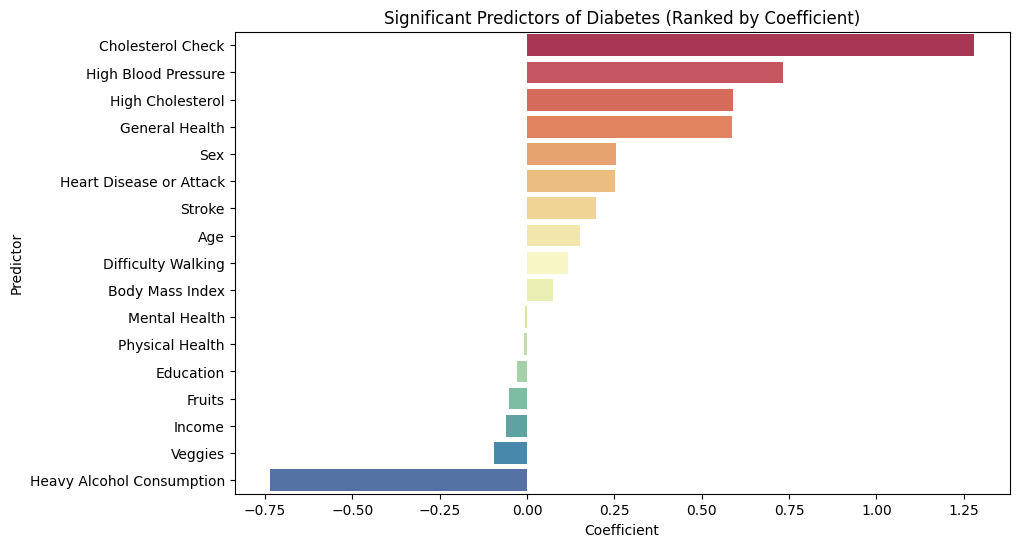

In [16]:
# visualization of the results and ranking them descending to the coeficcient
sorted_results = significant_results.sort_values(by='coefficient', ascending=False)

# bar plot for visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_results['coefficient'], y=sorted_results.index, palette="Spectral")
plt.title('Significant Predictors of Diabetes (Ranked by Coefficient)')
plt.xlabel('Coefficient')
plt.ylabel('Predictor')
plt.show()

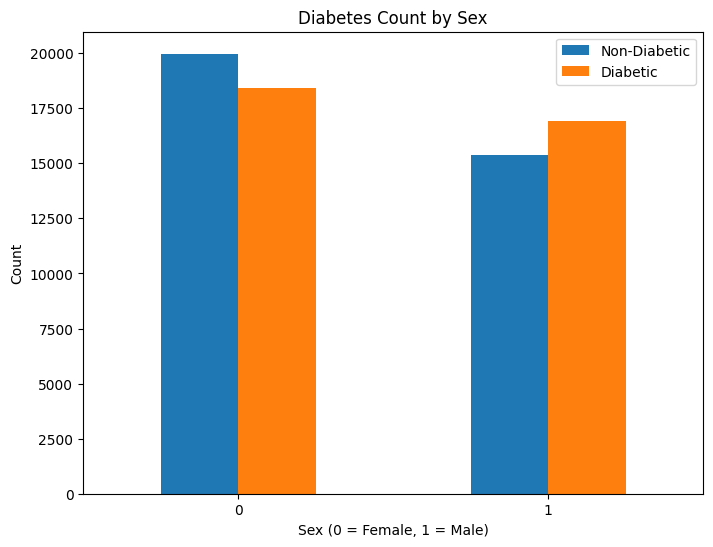

In [17]:
# Group data by sex and diabetes status and count occurrences
diabetes_by_sex = df.groupby(['Sex', 'Diabetes_binary'])['Diabetes_binary'].count().unstack()

# Create the bar chart
diabetes_by_sex.plot(kind='bar', figsize=(8, 6))
plt.title('Diabetes Count by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Non-Diabetic', 'Diabetic'])
plt.show()

In [18]:
#renaming the age buckets
df['Age'] = df['Age'].replace({
  1: '18 - 24',
  2: '25 - 29',
  3: '30 - 34',
  4: '35 - 39',
  5: '40 - 44',
  6: '45 - 49',
  7: '50 - 54',
  8: '55 - 59',
  9: '60 - 64',
  10: '65 - 69',
  11: '70 - 74',
  12: '75 - 79',
  13: '80 - 99'
})

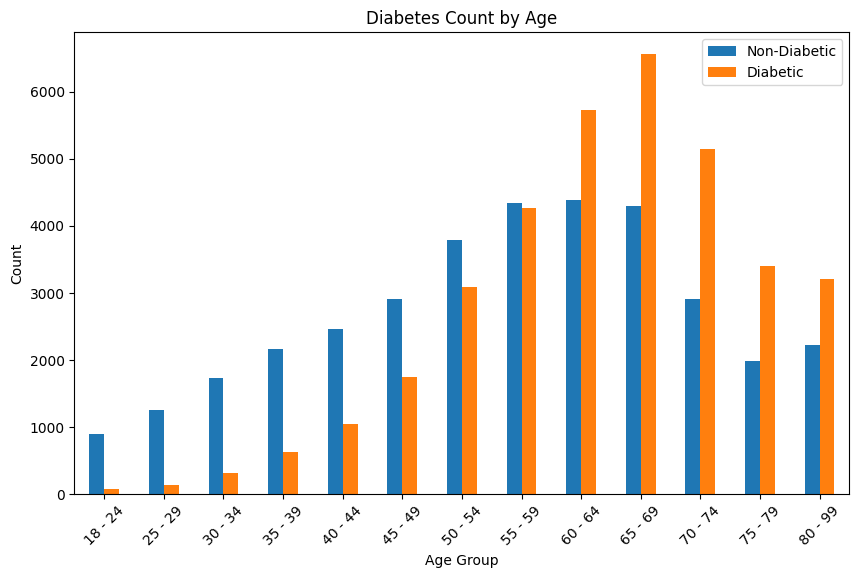

In [19]:
# Group data by age and diabetes status and count occurrences
diabetes_by_age = df.groupby(['Age', 'Diabetes_binary'])['Diabetes_binary'].count().unstack()

# Create the bar chart
diabetes_by_age.plot(kind='bar', figsize=(10, 6))
plt.title('Diabetes Count by Age')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Non-Diabetic', 'Diabetic'])
plt.show()


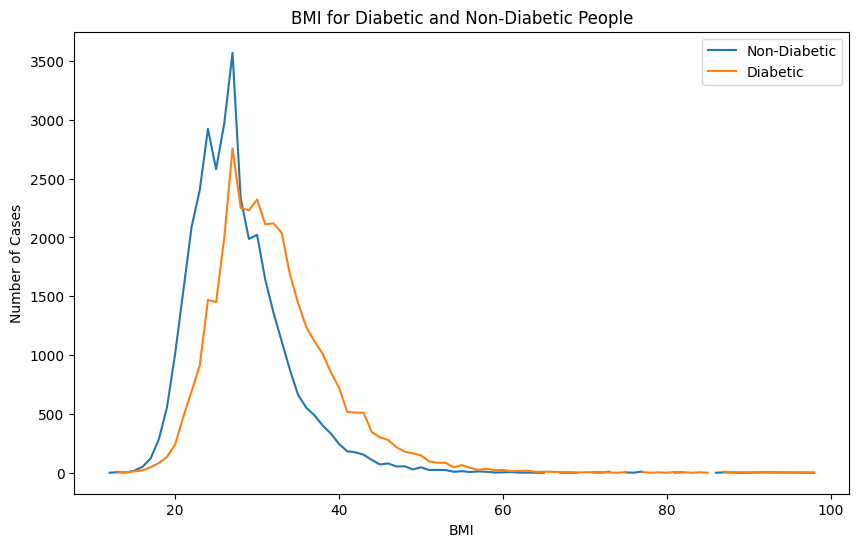

In [23]:
# Group data by BMI and diabetes status, then count occurrences
diabetes_by_bmi = df.groupby(['BMI', 'Diabetes_binary'])['Diabetes_binary'].count().unstack()

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(diabetes_by_bmi.index, diabetes_by_bmi[0], label='Non-Diabetic')
plt.plot(diabetes_by_bmi.index, diabetes_by_bmi[1], label='Diabetic')
plt.title('BMI for Diabetic and Non-Diabetic People')
plt.xlabel('BMI')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()